## Исходные данные

In [11]:
import matplotlib.pyplot as plt
import numpy as np

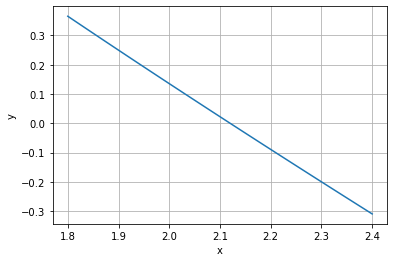

In [13]:
def function(x):
    return np.exp(-x) - x + 2
x = np.linspace(1.8, 2.4, 100)
y = [function(i) for i in x]
plt.xlabel("x") # ось абсцисс
plt.ylabel("y") # ось ординат
plt.grid()      # включение отображение сетки
plt.plot(x, y)

Область отделенного корня: $[1.8, 2.4]$

$ε = 10^{-8}$

## Задание
- Решить исходное уравнение методом дихотомии, простых итераций и Ньютона с заданной точностью
- Определить количество итераций для каждого метода


## Краткая теория

### Метод дихотомии:
$f(x) = 0$

$x^{*}\in [a,b]!\;$,    где $[a,b]$ – область отделенного корня и $f(x^{*}) = 0$

$x_0=a,\; \; x_1=b,\; \; x_2=\frac{x_0+x_1}{2}$

$x_k=\frac{x_{k-1}+x_{k-2}}{2},\; \; f(x_{k-1})*f(x_{k-2})<0$

#### Условие окончания итераций: $ |{x_k - x_{k - 1}}| < ε $

In [14]:
a = 1.8
b = 2.4
e = 10**-8

In [15]:
x0 = a
x1 = b
k = 3
while np.abs(x1 - x0) > e :
    x = (x0 + x1) / 2
    if function(x1) * function(x) < 0 :
        x0 = x
    else : x1 = x
    if k % 5 == 0 :
        print('x{}  =  {}'.format(k, x))
    k += 1 
print('Количество итераций:   {}\nКорень:   {}'.format(k, x))

x5  =  2.175
x10  =  2.1210937500000004
x15  =  2.1199951171875
x20  =  2.120029449462891
x25  =  2.1200282335281377
Количество итераций:   29
Корень:   2.1200282424688344


### Метод Ньютона
$f(x) = 0$

$x^{*}\in [a,b]!\;$,    где $[a,b]$ – область отделенного корня и $f(x^{*}) = 0$

$x_{k+1}=x_k-\frac{f(x_k)}{f'(x_k)}$

#### Теорема (сходимость метода Ньютона):
Если:
- $x^{*}\in [a,b]!\;$где $[a,b]$ – область отделенного корня и $f(x^{*}) = 0$
- $f(x) \in C^{(2)}[a,b],\;\; f'(x)≠0,\;\; f''(x)≠0\;\; ∀x\in [a,b]$
- $x_0 \in [a,b], \;\; f(x_0)*f''(x_0)>0$

тогда: $x_k= x^*$

#### Условие окончания итераций: $ |{x_k - x_{k - 1}}| < ε $

In [16]:
def derivative(x):
    return -np.exp(-x)-1

def double_derivative(x):
    return np.exp(-x)

x0 = a
while double_derivative(x0) * function(x0) < 0 :
    x0 += 0.05
print('x0 = ', x0)

k = 2
x1 = x0 - function(x0) / derivative(x0)
x2 = x1 - function(x1) / derivative(x1)
while np.abs(x2 - x1) > e :
    x1 = x2
    x2 = x2 - function(x2) / derivative(x2)
    print('x{} = {}'.format(k, x1))
    k += 1
print('Количество итераций:   {}\nКорень:   {}'.format(k, x2))

x0 =  1.8
x2 = 2.1200259335623035
x3 = 2.1200282389873566
Количество итераций:   4
Корень:   2.1200282389876413


### Метод простых итераций:
$f(x) = 0$

$x=φ(x)$

$φ(x)=x+cf(x),\;\;    f'(x)<1,\;\;   с - константа$

$x_0$ – начальное итерационное приближение

$x_k=φ(x_{k-1})$
#### Теорема (сходимость метода простых итераций)
Пусть $x_0$ – начальное итерационное приближение, которое выбирается так, что:
- $φ(x) \in C^{(1)}[a,b], \;\;S_0=[a,b]=\{x | |x-x_0|≤δ\} $
- $x^*=φ(x^*)∈[a,b]!$
- $q=|φ'(x)| <1$
- $x_1-x_0=φ(x_0)-x_0≤δ(1-q)$

тогда:
- Последовательность сходится, $x_k= φ(x_k)∈[a,b]$
- $x_k-x^*≤δq^k$

**Следствие**: $k(ε)=\left[\begin{array}{ccc}\frac{ln⁡(ε/δ)}{ln⁡(q)}\end{array}\right] +1$


In [17]:
c = 0.6
def fi_funcion(x):
    return x + c * function(x)
def fi_derivative(x):
    return 1 + c * derivative(x)
def fi_double_derivative(x):
    return c * double_derivative(x)

q = fi_derivative(b)
x1 = (a + b) / 2
x2 = fi_funcion(x1)
k = 2
while (q / (1 - q))*np.abs(x2 - x1) > e :
    x1 = x2
    x2 = fi_funcion(x1)
    if k % 5 == 0 :
        print('x{} = {}'.format(k, x1))
    k += 1
print('delta =', (b - a)/2)
print('q =', q)
print('Количество итераций:   {}\nКорень:   {}'.format(k, x2))
print('Априорная оценка:', int(np.log(e*2/(b - a))/np.log(q))+1)

x5 = 2.1197972259123037
x10 = 2.120027362234608
delta = 0.29999999999999993
q = 0.3455692280263526
Количество итераций:   15
Корень:   2.1200282356600173
Априорная оценка: 17
